<a href="https://colab.research.google.com/github/Geon27/4-1-Bitcoin/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EA%B3%BC%EC%A0%9C_%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_1129(%EC%A4%80%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#환경설정

In [1]:
# http://corazzon.github.io/matplotlib_font_setting
# 한글폰트 불러오기: 런타임을 다시 시작한 후 적용되기 때문에 실행 후
# 런타임 다시 시작(ctrl+M.) 후 다시 한번 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,786 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

Text(0.5, 0, '시간(분)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_

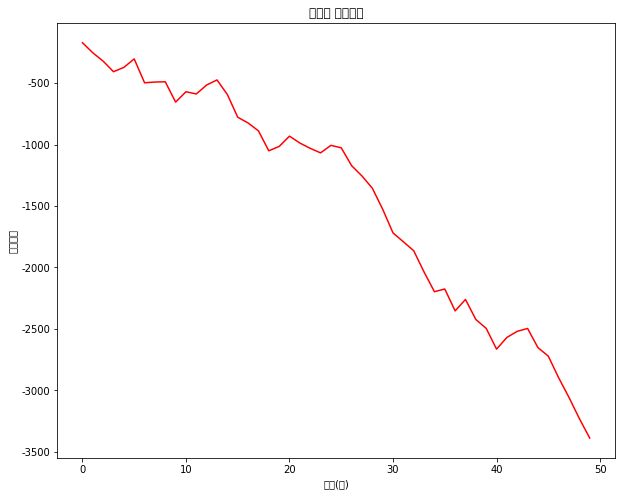

In [2]:
# 한글그래프 되는지 확인
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data
# 한글을 넣어놓고 그러보면 깨진다, 런타임 다시 실행시 한글이 나타남
plt.figure(figsize=(10,8)); plt.plot(range(50), data, 'r'); plt.title('시간별 가격추이')
plt.ylabel('주식가격'); plt.xlabel('시간(분)')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# csv 파일로드

In [5]:
#df = pd.read_csv("data/bike-station-207.csv", low_memory=False)
df = pd.read_csv("/content/drive/MyDrive/비트코인_시계열/20.01.01 ~ 22.10.31.csv", low_memory=False)
df.shape

(1035, 7)

In [6]:
df.head(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420.28K,0.05%
1,2020-01-02,6967.0,7199.7,7209.6,6901.4,632.78K,-3.23%
2,2020-01-03,7343.1,6967.1,7402.9,6884.1,936.29K,5.40%
3,2020-01-04,7376.8,7345.1,7433.1,7291.4,523.91K,0.46%
4,2020-01-05,7372.5,7376.8,7501.0,7345.6,628.14K,-0.06%
5,2020-01-06,7759.1,7372.6,7783.1,7366.7,786.75K,5.24%
6,2020-01-07,8155.7,7759.1,8182.0,7754.1,1.01M,5.11%
7,2020-01-08,8059.6,8154.2,8436.4,7900.8,1.19M,-1.18%
8,2020-01-09,7842.4,8060.0,8065.9,7779.2,786.50K,-2.70%
9,2020-01-10,8187.1,7842.5,8187.4,7697.7,1.05M,4.40%


In [7]:
df.tail(15)

,날짜,종가,오픈,고가,저가,거래량,변동 %
1020,2022-10-17,19548.2,19262.2,19663.5,19163.6,248.40K,1.49%
1021,2022-10-18,19328.2,19548.4,19692.9,19102.8,290.07K,-1.13%
1022,2022-10-19,19123.9,19328.2,19358.6,19101.2,209.28K,-1.06%
1023,2022-10-20,19042.9,19125.1,19334.5,18935.6,253.20K,-0.42%
1024,2022-10-21,19162.6,19042.9,19245.5,18703.3,294.66K,0.63%
1025,2022-10-22,19204.8,19162.6,19249.9,19116.1,118.24K,0.22%
1026,2022-10-23,19571.2,19204.8,19680.9,19092.5,180.63K,1.91%
1027,2022-10-24,19331.5,19571.2,19588.6,19177.2,286.94K,-1.22%
1028,2022-10-25,20082.7,19331.8,20406.9,19249.0,371.54K,3.89%
1029,2022-10-26,20769.5,20086.8,20981.5,20062.9,427.99K,3.42%


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1035 non-null   object 
 1   종가      1035 non-null   float64
 2   오픈      1035 non-null   float64
 3   고가      1035 non-null   float64
 4   저가      1035 non-null   float64
 5   거래량     1035 non-null   object 
 6   변동 %    1035 non-null   object 
dtypes: float64(4), object(3)
memory usage: 56.7+ KB


In [9]:
df.columns

Index(['날짜', '종가', '오픈', '고가', '저가', '거래량', '변동 %'], dtype='object')

In [10]:
pd.Series(df.columns)

0      날짜
1      종가
2      오픈
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [11]:
df["날짜연월"] = df["날짜"].apply(lambda x : x[:7])

In [12]:
df

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420.28K,0.05%,2020-01
1,2020-01-02,6967.0,7199.7,7209.6,6901.4,632.78K,-3.23%,2020-01
2,2020-01-03,7343.1,6967.1,7402.9,6884.1,936.29K,5.40%,2020-01
3,2020-01-04,7376.8,7345.1,7433.1,7291.4,523.91K,0.46%,2020-01
4,2020-01-05,7372.5,7376.8,7501.0,7345.6,628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...,...
1030,2022-10-27,20292.9,20769.5,20867.9,20231.6,365.49K,-2.29%,2022-10
1031,2022-10-28,20594.4,20293.0,20744.0,20058.2,318.90K,1.49%,2022-10
1032,2022-10-29,20809.8,20594.2,21038.1,20561.9,276.54K,1.05%,2022-10
1033,2022-10-30,20626.3,20809.4,20922.3,20522.5,207.63K,-0.88%,2022-10


#날짜데이터

###날짜데이터 변환

In [13]:
# 날짜 형식을 datetime의 type로 변환
df["날짜"] = pd.to_datetime(df["날짜"])          
df[["날짜"]].dtypes

날짜    datetime64[ns]
dtype: object

In [14]:
# df의 전체 값 확인
df

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420.28K,0.05%,2020-01
1,2020-01-02,6967.0,7199.7,7209.6,6901.4,632.78K,-3.23%,2020-01
2,2020-01-03,7343.1,6967.1,7402.9,6884.1,936.29K,5.40%,2020-01
3,2020-01-04,7376.8,7345.1,7433.1,7291.4,523.91K,0.46%,2020-01
4,2020-01-05,7372.5,7376.8,7501.0,7345.6,628.14K,-0.06%,2020-01
...,...,...,...,...,...,...,...,...
1030,2022-10-27,20292.9,20769.5,20867.9,20231.6,365.49K,-2.29%,2022-10
1031,2022-10-28,20594.4,20293.0,20744.0,20058.2,318.90K,1.49%,2022-10
1032,2022-10-29,20809.8,20594.2,21038.1,20561.9,276.54K,1.05%,2022-10
1033,2022-10-30,20626.3,20809.4,20922.3,20522.5,207.63K,-0.88%,2022-10


In [15]:
df["연도"] = df["날짜"].dt.year
df["월"] = df["날짜"].dt.month
df["일"] = df["날짜"].dt.day
df["요일"] = df["날짜"].dt.dayofweek
df["일자"] = df["날짜"].dt.date

df.sample()

,날짜,종가,오픈,고가,저가,거래량,변동 %,날짜연월,연도,월,일,요일,일자
211,2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14K,-0.09%,2020-07,2020,7,30,3,2020-07-30


In [16]:
#df["대여시간"].value_counts().sort_values(ascending=True)
# df["거래량"].value_counts().sort_index()
df["날짜연월"].sort_index()

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
1030    2022-10
1031    2022-10
1032    2022-10
1033    2022-10
1034    2022-10
Name: 날짜연월, Length: 1035, dtype: object

###날짜데이터 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

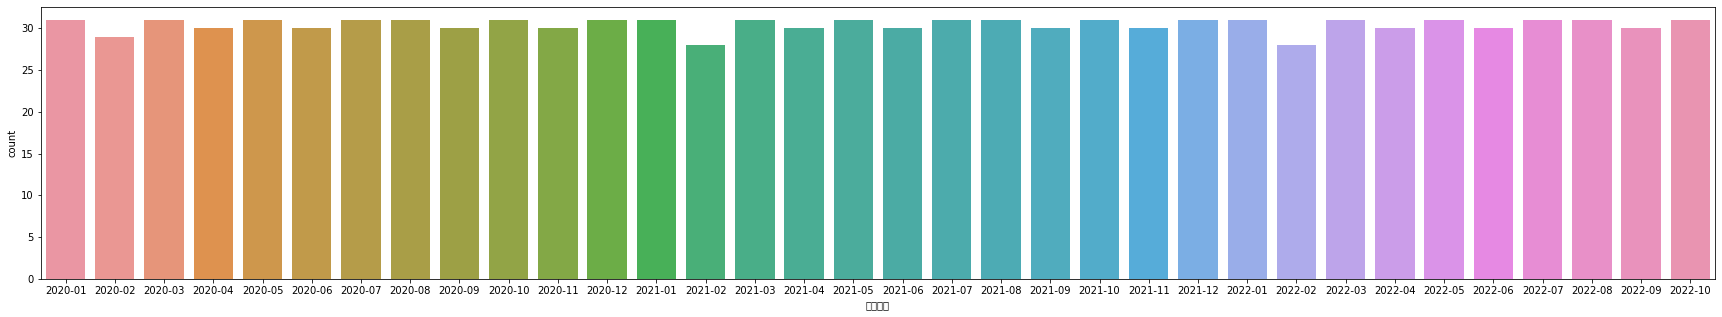

In [17]:
  # 수치를 집계해보기 전에 countplot으로 분석, 'year'의 값 확인
  plt.figure(figsize=(30, 5))
  sns.countplot(data=df, x="날짜연월")

### 월별 / 년도별 거래량, 변동량 확인

In [18]:
df.dtypes

날짜      datetime64[ns]
종가             float64
오픈             float64
고가             float64
저가             float64
거래량             object
변동 %            object
날짜연월            object
연도               int64
월                int64
일                int64
요일               int64
일자              object
dtype: object

In [19]:
# value 값은 "대여일시"로 넣어주었는데 어떤 컬럼을 넣어주어도 count값을 동일하게 구한다.
# 대여일자로 구하게 되면 reset_index()에서 컬럼명이 중복되기 때문에 오류가 발생해서 다른 컬럼으로 구해왔다.
df_rent_group = df.groupby(["날짜연월","연도","월","일","요일","일자"])["종가"].sum()
df_rent_group.head()

날짜연월     연도    월  일  요일  일자        
2020-01  2020  1  1  2   2020-01-01    7199.8
                  2  3   2020-01-02    6967.0
                  3  4   2020-01-03    7343.1
                  4  5   2020-01-04    7376.8
                  5  6   2020-01-05    7372.5
Name: 종가, dtype: float64

In [20]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["날짜연월","연도","월","일","요일","일자","종가"]
df_rent.head()

,날짜연월,연도,월,일,요일,일자,종가
0,2020-01,2020,1,1,2,2020-01-01,7199.8
1,2020-01,2020,1,2,3,2020-01-02,6967.0
2,2020-01,2020,1,3,4,2020-01-03,7343.1
3,2020-01,2020,1,4,5,2020-01-04,7376.8
4,2020-01,2020,1,5,6,2020-01-05,7372.5


###시간데이터별 거래량, 변동량 시각화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0fd4249d0>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

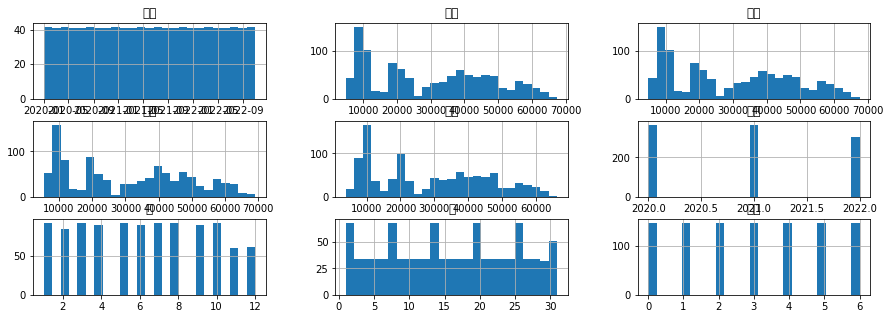

In [21]:
# 수치 데이터를 히스토그램으로 표현해 본다.
# 수치 데이터를 막대그래프로 표현하기 위해서는 도수분포표를 만들고 이를 시각화 하는 것이 히스토그램이다.
df.hist(figsize = (15,5), bins=25)

In [22]:
df_rent_year = df_rent.groupby('연도')['종가'].mean()
df_rent_year

연도
2020    11111.631148
2021    47410.840000
2022    30377.630263
Name: 종가, dtype: float64

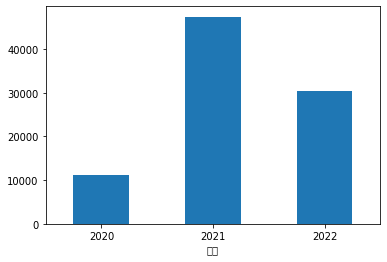

In [23]:
df_rent_year.plot.bar(rot=0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


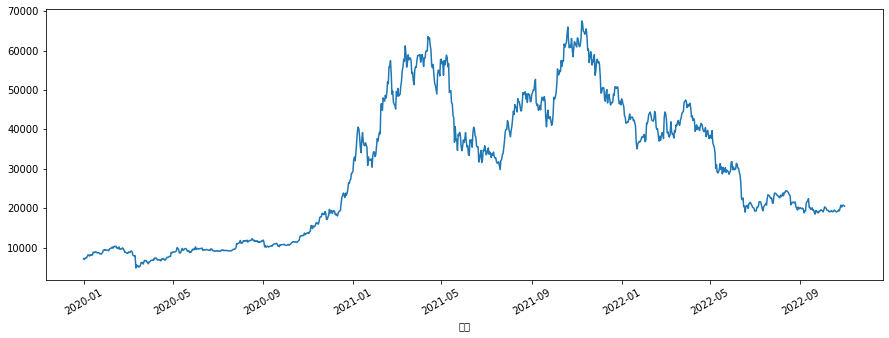

In [24]:
df_rent_day = df_rent.groupby('일자')['종가'].mean()
df_rent_day.plot(rot=30, figsize=(15, 5))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


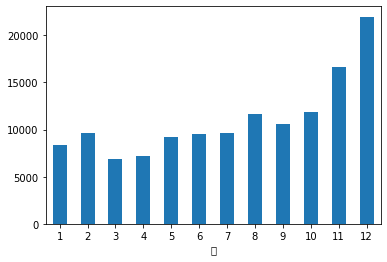

In [25]:
df_rent_2020 = df_rent[df_rent["연도"] == 2020]
df_rent_2020.groupby('월')['종가'].mean().plot.bar(rot=0)

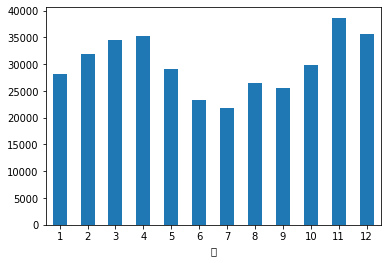

In [26]:
df_rent_month = df_rent.groupby('월')['종가'].mean()
df_rent_month.plot.bar(rot=0)

In [27]:
# 대여연도와 월별 대여수 평균을 구한다.
df_rent_날짜연월 = df_rent.groupby('날짜연월')['종가'].mean()
df_rent_날짜연월

날짜연월
2020-01     8378.800000
2020-02     9636.562069
2020-03     6863.106452
2020-04     7211.030000
2020-05     9253.551613
2020-06     9481.850000
2020-07     9592.100000
2020-08    11638.406452
2020-09    10643.326667
2020-10    11888.358065
2020-11    16660.766667
2020-12    21982.048387
2021-01    34745.083871
2021-02    46295.660714
2021-03    54863.816129
2021-04    57070.046667
2021-05    46435.112903
2021-06    35822.630000
2021-07    34424.267742
2021-08    45686.306452
2021-09    45922.900000
2021-10    57897.616129
2021-11    60679.753333
2021-12    49296.770968
2022-01    41093.712903
2022-02    40739.460714
2022-03    41957.051613
2022-04    41408.300000
2022-05    31695.303226
2022-06    24378.823333
2022-07    21532.929032
2022-08    22353.016129
2022-09    19794.286667
2022-10    19647.096774
Name: 종가, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text

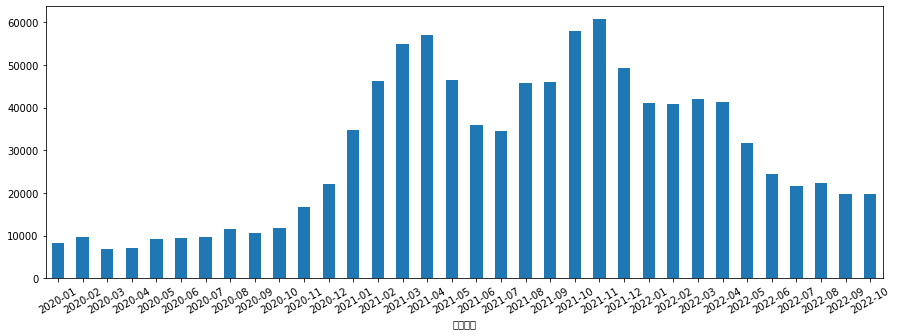

In [28]:
df_rent_날짜연월.plot.bar(rot=30, figsize=(15, 5))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

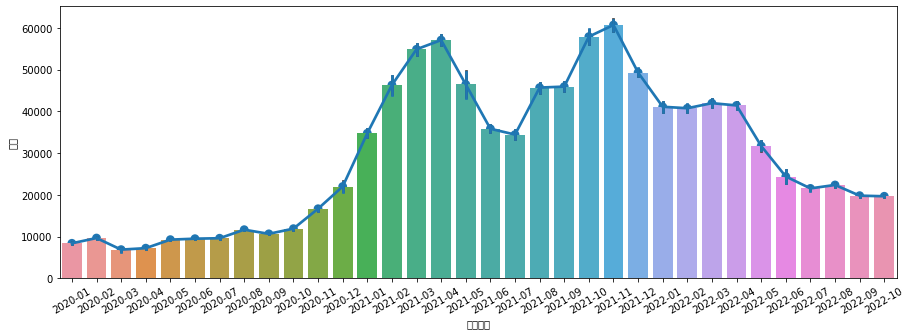

In [29]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="날짜연월", y="종가")
sns.pointplot(data=df_rent, x="날짜연월", y="종가")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

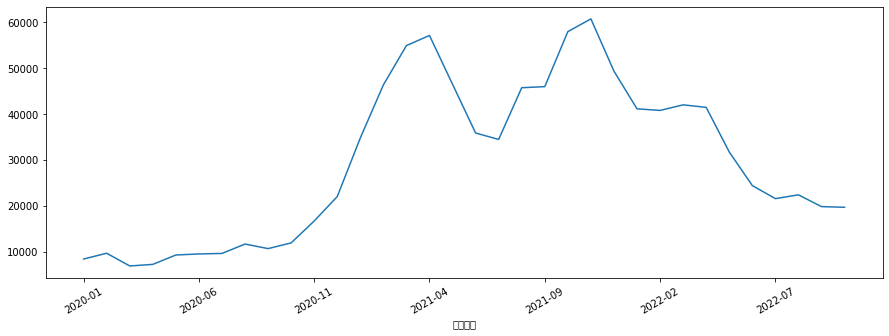

In [30]:
df_rent.groupby('날짜연월')['종가'].mean().plot(rot=30, figsize=(15, 5))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

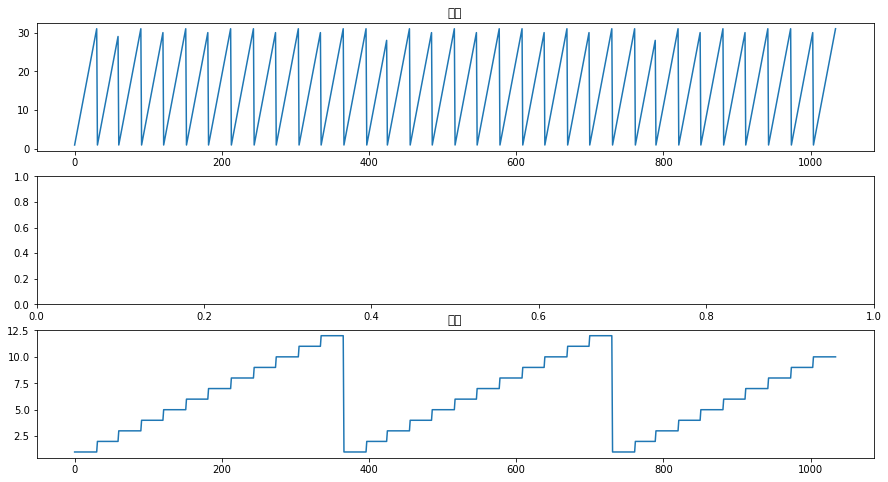

In [31]:
fig,axs = plt.subplots(3,1)

df_rent["일"].plot(figsize = (15,8), title = "일별", ax = axs[0])
df_rent["월"].plot(figsize = (15,8), title = "월별", ax = axs[2])

#시계열 분석

## Simple Moving Average

In [32]:
# Determine rolling statistics
# 30일치 rolling mean을 구해서 시각화 합니다.
rolmean = df_rent_day.rolling(window=12).mean()  # 열 기준으로 계산할 경우 행의 수
# window size 30 denotes 30 days, giving rolling mean at monthly level
rolstd = df_rent_day.rolling(window=12).std()

In [33]:
rolmean

일자
2020-01-01             NaN
2020-01-02             NaN
2020-01-03             NaN
2020-01-04             NaN
2020-01-05             NaN
                  ...     
2022-10-27    19560.025000
2022-10-28    19671.066667
2022-10-29    19776.200000
2022-10-30    19884.375000
2022-10-31    19998.741667
Name: 종가, Length: 1035, dtype: float64

In [34]:
rolstd

일자
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
                 ...    
2022-10-27    540.201069
2022-10-28    606.261213
2022-10-29    687.026559
2022-10-30    711.822530
2022-10-31    688.395871
Name: 종가, Length: 1035, dtype: float64

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


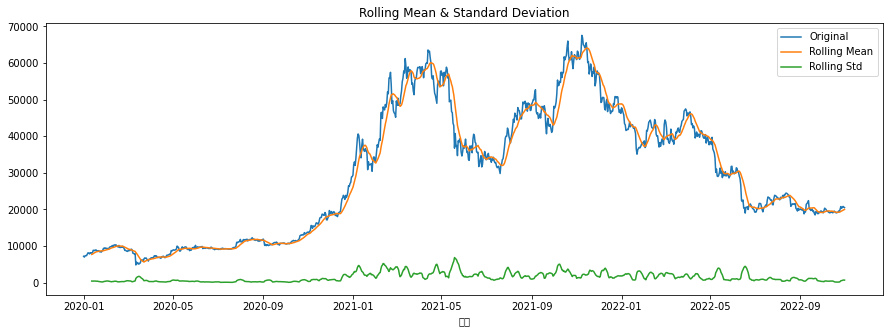

In [35]:
import matplotlib.pyplot as plt

df_rent_day.plot(label='Original')
rolmean.plot(label='Rolling Mean')
rolstd.plot(label='Rolling Std', figsize=(15, 5))

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

## Weighted Moving Average
* exponentially-weighted-windows
* [Computational tools — pandas 0.25.0 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows)

In [36]:
df_rent['WMA12'] = df_rent['종가'].ewm(span=12).mean()
df_rent['WMA6'] = df_rent['종가'].ewm(span=6).mean()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

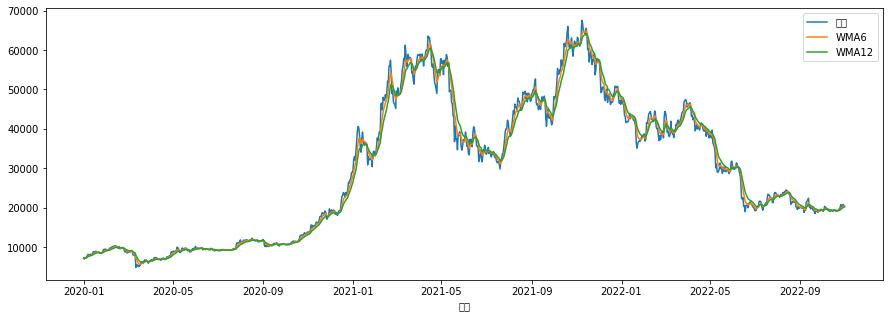

In [37]:
df_rent[['일자', '종가', 'WMA6','WMA12']].plot(x='일자', figsize=(15,5))

## Simple Exponential Smoothing

In [38]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_

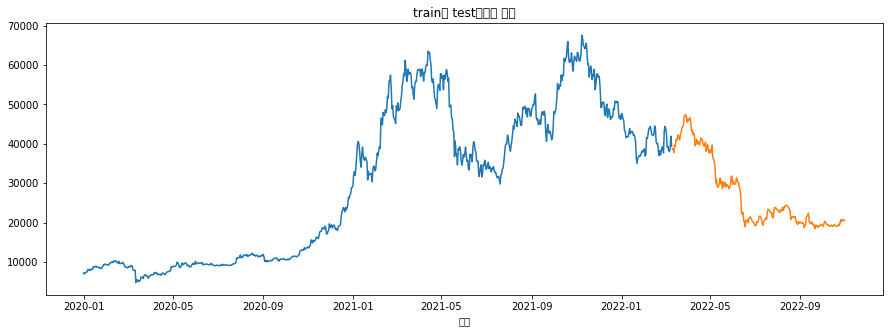

In [39]:
train["종가"].plot(figsize=(15,5))
test["종가"].plot(title='train과 test세트로 분할')

In [40]:
# import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(pd.np.asarray(train['종가'].astype(np.float)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [41]:
ses_result = ses_model.fit()
ses_result

In [42]:
y_hat = test.copy()
y_hat['SES'] = ses_result.forecast(len(test))
y_hat['SES'][:3]

일자
2022-03-11    39504.825615
2022-03-12    39504.825615
2022-03-13    39504.825615
Name: SES, dtype: float64

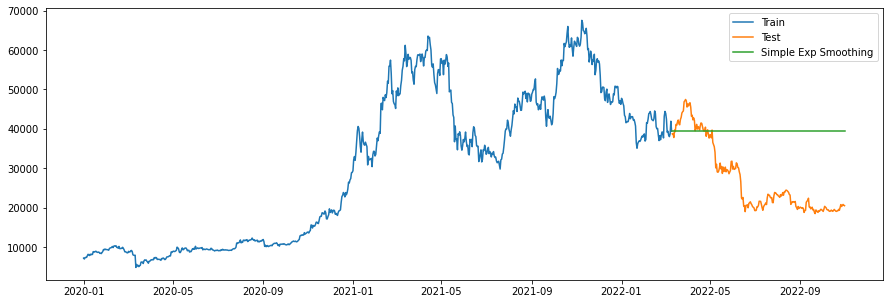

In [43]:
plt.figure(figsize=(15,5))
plt.plot(train['종가'], label='Train')
plt.plot(test['종가'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [44]:
rmse = {}
# root mean squared error 로 오차를 계산해 본다.
rmse["SES"] = np.sqrt(np.square(test['종가'] - y_hat['SES']).mean())
rmse["SES"]

15098.91179063429

In [45]:
rmse

{'SES': 15098.91179063429}

# ARIMA 모델

## Seasonal ARIMA
* 참고 : [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

### Trend
* p: Trend autoregression order. AR(p)모형의 p차수
* d: Trend difference order. 트랜드를 제거하여 안정시계열로 만들기 위한 I(d)의 차분 차수 d
* q: Trend moving average order. MA(q)의 q차수 

### Seasonal
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [46]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

In [47]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
m = 7
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [48]:
# Grid Search와 유사하게 최적의 파라메터 값을 찾는다.
y = train['종가'].to_list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f"ARIMA{param}x{param_seasonal}{m} - AIC:{results.aic}")
        except:
            continue

In [49]:
# from statsmodels.tsa.ar_model import AR
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, acf
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.stattools import adfuller

In [50]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from statsmodels.api import tsa

In [52]:
# ARIMA(p,d,q)(P,D,Q)m
# ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:10083.141308943608
arima = tsa.statespace.SARIMAX(train['종가'].to_list(),
                                  order=(1,1,1),
                                  seasonal_order=(0,1,1,7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# 학습
arima_result = arima.fit()
print(arima_result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9442      0.109     -8.627      0.000      -1.159      -0.730
ma.L1          0.9343      0.117      7.952      0.000       0.704       1.165
ma.S.L7       -0.9990      0.030    -33.735      0.000      -1.057      -0.941
sigma2      2.013e+06   1.47e-08   1.37e+14      0.000    2.01e+06    2.01e+06


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [53]:
arima_result

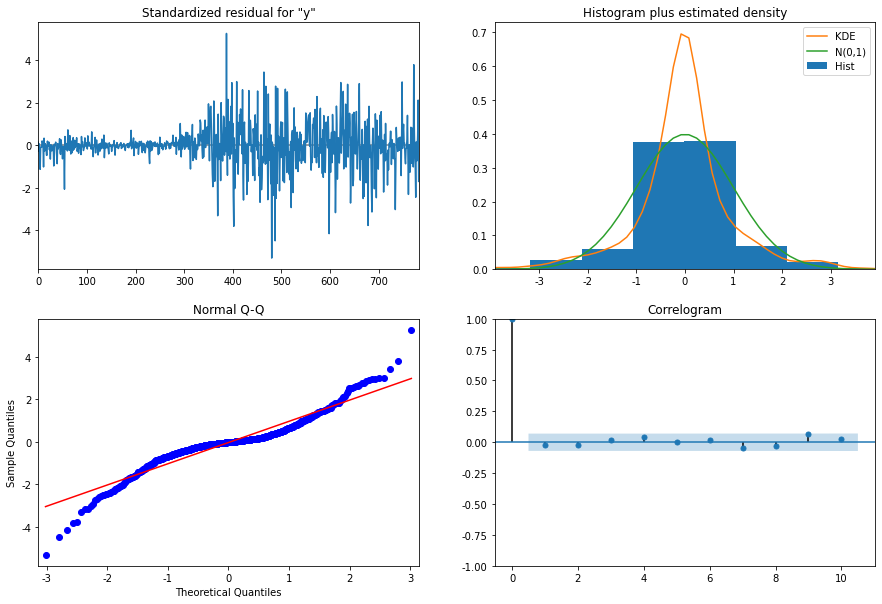

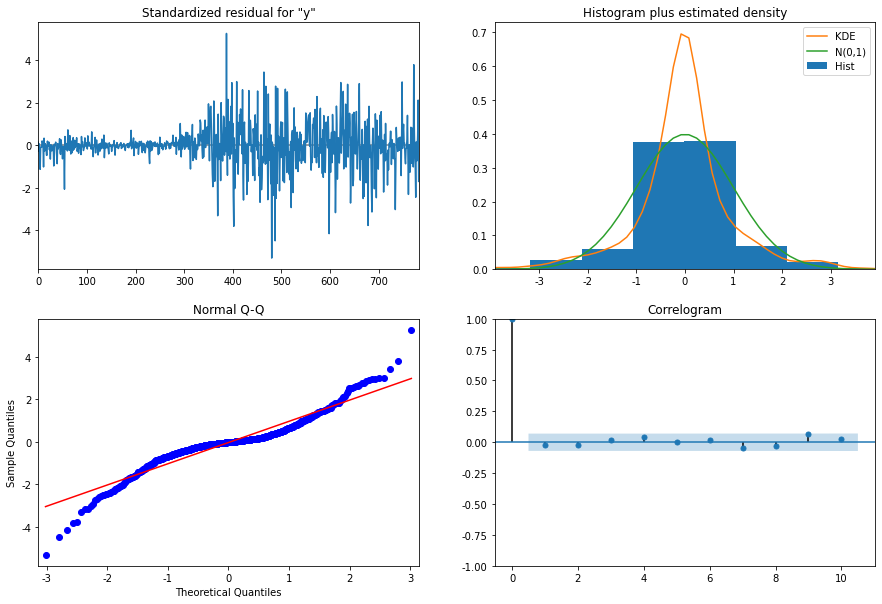

In [54]:
arima_result.plot_diagnostics(figsize=(15, 10))

In [55]:
# 예측
predict_value = arima_result.predict(start=801, end=1035, dynamic=True)
predict_value[:5]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


array([39528.30270505, 39574.49959676, 39644.01473429, 39705.45931846,
       39880.61273691])

In [56]:
y_hat = test.copy()
y_hat['ARIMA']= predict_value
y_hat['ARIMA'].head()

일자
2022-03-11    39528.302705
2022-03-12    39574.499597
2022-03-13    39644.014734
2022-03-14    39705.459318
2022-03-15    39880.612737
Name: ARIMA, dtype: float64

In [57]:
len(y_hat)

235

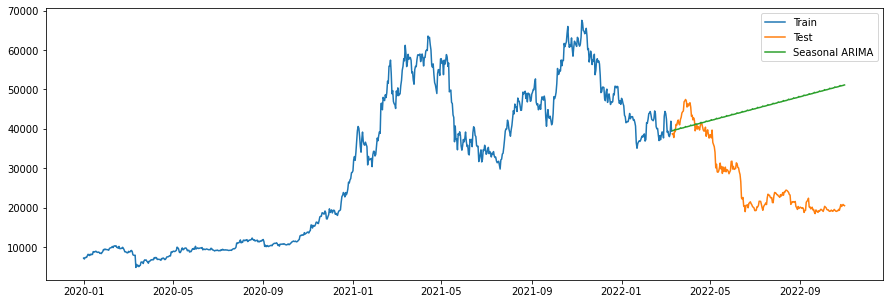

In [58]:
plt.figure(figsize=(15,5))
plt.plot(train['종가'], label='Train')
plt.plot(test['종가'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [59]:
# root mean squared error 로 오차를 계산해 본다., 작을수록 좋음
rmse = {}
rmse["ARIMA"] = np.sqrt(np.square(test['종가'] - y_hat['ARIMA']).mean())
#print(rmse["ARIMA"])
print(type(rmse))

<class 'dict'>


In [60]:
rmse

{'ARIMA': 21651.03213071269}

## auto-ARIMA

In [61]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 45.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [62]:
import pmdarima as pm
auto_arima = pm.auto_arima(train['종가'], stepwise=False, seasonal=True)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [63]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6922.472
Date:                Wed, 30 Nov 2022   AIC                          13848.944
Time:                        01:53:59   BIC                          13858.311
Sample:                    01-01-2020   HQIC                         13852.543
                         - 03-10-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.3210     49.625      0.813      0.416     -56.942     137.584
sigma2      1.963e+06   5.43e+04     36.142      0.000    1.86e+06    2.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):               692.81
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              23.02   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
#arima_result = auto_arima.fit()

In [65]:
#len(test)
#auto_arima.predict(n_periods=len(test))

In [66]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
print(forecast_test_auto)
#y_hat['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)
y_hat['auto_ARIMA'] = list(forecast_test_auto)

2022-03-11    39456.621026
2022-03-12    39496.942053
2022-03-13    39537.263079
2022-03-14    39577.584105
2022-03-15    39617.905131
                  ...     
2022-10-27    48730.457071
2022-10-28    48770.778098
2022-10-29    48811.099124
2022-10-30    48851.420150
2022-10-31    48891.741176
Freq: D, Length: 235, dtype: float64


In [67]:
y_hat

,종가,ARIMA,auto_ARIMA
일자,,,
2022-03-11,38730.2,39528.302705,39456.621026
2022-03-12,38814.3,39574.499597,39496.942053
2022-03-13,37792.4,39644.014734,39537.263079
2022-03-14,39671.1,39705.459318,39577.584105
2022-03-15,39285.7,39880.612737,39617.905131
...,...,...,...
2022-10-27,20292.9,50931.496210,48730.457071
2022-10-28,20594.4,50983.854534,48770.778098
2022-10-29,20809.8,51002.576622,48811.099124


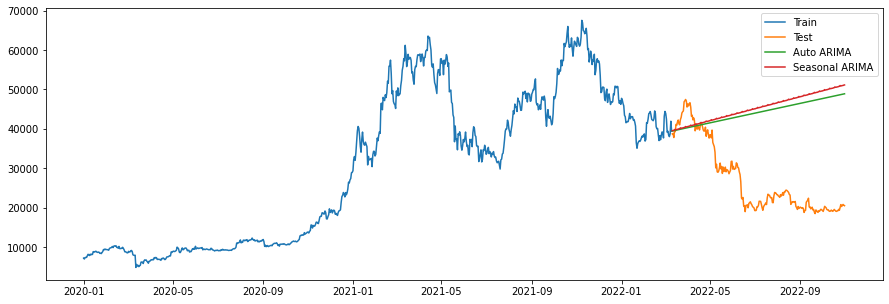

In [68]:
plt.figure(figsize=(15,5))
plt.plot(train['종가'], label='Train')
plt.plot(test['종가'], label='Test')
plt.plot(y_hat['auto_ARIMA'], label='Auto ARIMA')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()